### Import Libraries and read the dataset

In [14]:
from keras.datasets import mnist

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#set figsize to 3,3
plt.rcParams['figure.figsize'] = (3,3)

#tensorflow libraries
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df_train = pd.read_csv('Datasets/fashion-mnist_train.csv')
df_test = pd.read_csv('Datasets/fashion-mnist_test.csv')

In [40]:
X_train = df_train.iloc[:,1:]
X_test = df_test.iloc[:,1:]

y_train = df_train['label']
y_test = df_test['label']

### About the Data

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |


In [4]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
28*28
# each image is of size 28px * 28px

784

### Check the images

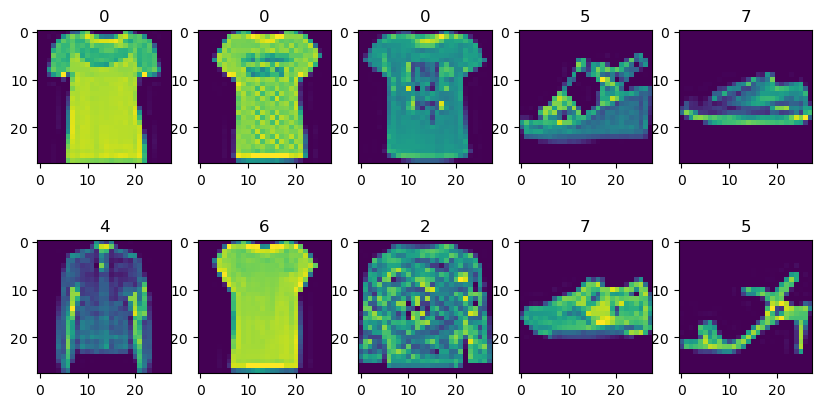

In [8]:
import random
#random.seed(42)
plt.figure(figsize=(10,5))

for i in range(10):
    img_index = random.randint(0, 60000)
    img = np.array(df_train.iloc[img_index, 1:])
    img = img.reshape(28,28)
    plt.subplot(2,5,i+1)
    plt.title(df_train.iloc[img_index, 0])
    plt.imshow(img)

### Preprocess the data

In [9]:
#reshaping
X_train = X_train.values.reshape(-1, 28,28,1)
X_test =  X_test.values.reshape(-1, 28,28,1)

In [10]:
#normalize 
X_train = X_train/255
X_test = X_test/255

In [11]:
# Onehot encode labels - to_categorical(labels)
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [13]:
print(f'X_train : {X_train.shape}')
print(f'X_train : {X_test.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_test : {y_test.shape}')

X_train : (60000, 28, 28, 1)
X_train : (10000, 28, 28, 1)
y_train : (60000, 10)
y_test : (10000, 10)


### Modelling

In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# Output layer with 10 neurons as we have 10 classes
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 32)       │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,914 (327.79 KB)

 Trainable params: 83,914 (327.79 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [19]:
model.fit(X_train, y_train, epochs = 20, validation_data=(X_test, y_test), callbacks=early_stopping)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9068 - loss: 0.2500 - val_accuracy: 0.9058 - val_loss: 0.2592
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9171 - loss: 0.2248 - val_accuracy: 0.9061 - val_loss: 0.2634
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9232 - loss: 0.2069 - val_accuracy: 0.9069 - val_loss: 0.2541
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9314 - loss: 0.1858 - val_accuracy: 0.9066 - val_loss: 0.2610
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9359 - loss: 0.1723 - val_accuracy: 0.9074 - val_loss: 0.2598


In [20]:
losses = model.history.history

In [26]:
loss_df = pd.DataFrame(losses)
loss_df

,accuracy,loss,val_accuracy,val_loss
0,0.907333,0.249175,0.9058,0.259166
1,0.915683,0.229097,0.9061,0.263357
2,0.921583,0.209724,0.9069,0.254089
3,0.926883,0.195017,0.9066,0.261041
4,0.932933,0.179883,0.9074,0.259844


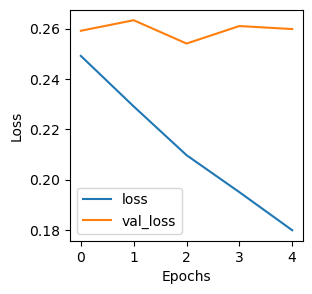

In [28]:
plt.plot(loss_df[['loss', 'val_loss']])
plt.legend(['loss', 'val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

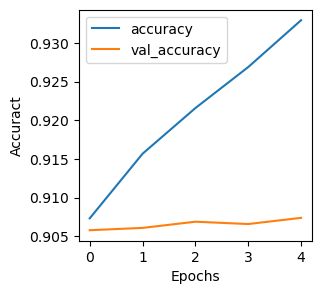

In [29]:
plt.plot(loss_df[['accuracy', 'val_accuracy']])
plt.legend(['accuracy', 'val_accuracy'])
plt.ylabel('Accuract')
plt.xlabel('Epochs')
plt.show()

In [35]:
preds = model.predict(X_test)
preds

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[9.9801046e-01, 4.2284878e-08, 1.6070016e-03, ..., 7.6270057e-09,
        9.6547028e-06, 9.6424326e-09],
       [1.4850134e-07, 9.9999964e-01, 5.7469625e-09, ..., 7.2388939e-16,
        1.4958635e-08, 2.5949821e-13],
       [1.2413755e-03, 3.0044460e-11, 9.9492908e-01, ..., 7.8082864e-13,
        5.3987410e-08, 2.0390310e-10],
       ...,
       [7.1837289e-12, 9.2459758e-14, 2.4362644e-13, ..., 3.2942054e-12,
        1.0000000e+00, 1.4166890e-14],
       [1.2373365e-04, 2.2969186e-06, 5.9386716e-06, ..., 3.8991093e-06,
        9.9954236e-01, 4.0136028e-06],
       [2.8695140e-03, 9.7243786e-01, 1.2714084e-02, ..., 4.8091597e-06,
        1.0844597e-03, 4.2577492e-05]], dtype=float32)

In [37]:
preds = np.argmax(preds, axis=1)
preds

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

### Evaluation Metrics

In [41]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.82      0.90      0.86      1000
           3       0.91      0.92      0.92      1000
           4       0.90      0.80      0.85      1000
           5       0.97      0.98      0.98      1000
           6       0.78      0.70      0.74      1000
           7       0.97      0.92      0.94      1000
           8       0.97      0.98      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [42]:
print(accuracy_score(y_test, preds))

0.9074


In [43]:
print(confusion_matrix(y_test, preds))

[[899   1  31  14   1   0  46   0   8   0]
 [  3 986   3   7   1   0   0   0   0   0]
 [ 18   0 900  12  34   1  30   0   5   0]
 [ 20   5  11 923  15   0  24   0   2   0]
 [  1   1  69  31 798   0  97   0   2   1]
 [  0   1   1   0   0 982   0  11   0   5]
 [153   1  76  25  35   0 700   0  10   0]
 [  0   0   0   0   0  24   0 923   0  53]
 [  6   0   4   0   2   1   2   0 985   0]
 [  0   0   0   0   0   2   0  20   0 978]]


### Predict on random image

In [72]:
def predict():
    # read random image from test set
    img_index = random.randint(0, 10000)
    img = np.array(df_test.iloc[img_index, 1:])

    # preprocess the array
    img = img/255
    show_img = np.array(img).reshape(28,28)
    img = np.array(img).reshape(-1, 28,28,1)
    
    # plot the image to see what it is
    plt.imshow(show_img)

    pred = model.predict(img)
    pred = np.argmax(pred, axis=1)
    
    print(pred)
    if pred == 0:
        print('Result : The image is of a T-shirt/top')
    elif pred == 1:
        print('Result : The image is of Trouser')
    elif pred == 2:
        print('Result : The image is of Pullover')
    elif pred == 3:
        print('Result : The image is of Dress')
    elif pred == 4:
        print('Result : The image is of Coat')
    elif pred == 5:
        print('Result : The image is of Sandal')
    elif pred == 6:
        print('Result : The image is of Shirt')
    elif pred == 7:
        print('Result : The image is of Sneaker')
    elif pred == 8:
        print('Result : The image is of Bag')
    elif pred == 9:
        print('Result : The image is of Ankle boot')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[4]
Result : The image is of Coat


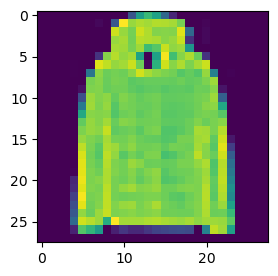

In [80]:
predict()

In [81]:
# save the model
model.save('fashion_classification.h5')